# This code is the first step towards integration

In [3]:
from dtwinpylib.dtwinpy.Digital_Twin import Digital_Twin
from dtwinpylib.dtwinpy.services import Service_Handler
from dtwinpylib.dtwinpy.interfaceDB import Database

import importlib
import dtwinpylib
importlib.reload(dtwinpylib.dtwinpy.Digital_Twin) #reload this specifc module to upadte the class
importlib.reload(dtwinpylib.dtwinpy.services)


<module 'dtwinpylib.dtwinpy.services' from 'c:\\Users\\pedro\\Github Repositories\\Digital_Twin\\Digital Twin\\dtwinpylib\\dtwinpy\\services.py'>

## Tesing in Deterministic 5s Model

==========  Reading the Model: 5s_determ  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
|-- Parts stored: Part 1
|-- Parts stored: Part 2
|-- Parts stored: Part 3
Queue Lenght: 3
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 20
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
Branching Machine: Branch 1 | Machine 1
|-- Conveyor towards Queue 2
|-- Conveyor towards Queue 3
--- Part already being processed: Part 4 ---
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Cluster: 2
--- Part already being processed: Part 5 ---

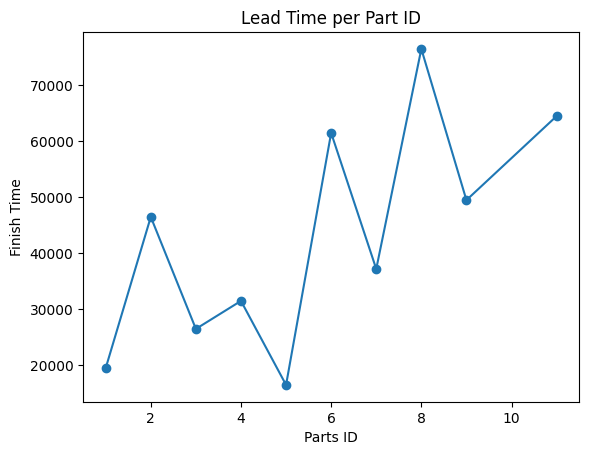

- Maximum Cycle Time: 50000
- Minimum Cycle Time: 16500
>>> Average system cycle time: 28920.4 [time unit]***


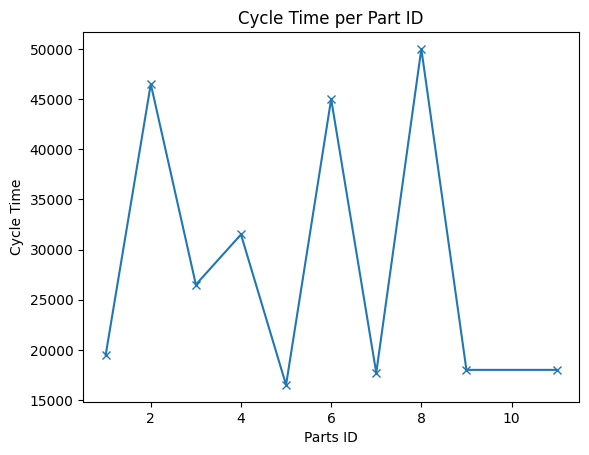

>>> System Throughput: 0.00013071895424836603 [parts / time unit] 


<Figure size 640x480 with 0 Axes>

In [2]:
mydt = Digital_Twin(name= "5s_determ", maxparts= 10)
mydt.run_digital_model()

#### Running validation for the same data

In [3]:
mydt.run_validation(copied_realDB= True)

==========  Reading the Model: 5s_determ  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
|-- Parts stored: Part 1
|-- Parts stored: Part 2
|-- Parts stored: Part 3
|-- Parts stored: Part 4
|-- Parts stored: Part 5
Queue Lenght: 5
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 20
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
Branching Machine: Branch 1 | Machine 1
|-- Conveyor towards Queue 2
|-- Conveyor towards Queue 3
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Cluster: 2
----------------
> Machine 3
--Queue In

#### Running Synchronization (base on the last digital simulation)

In [4]:
mydt.run_sync(copied_realDB= True)

==========  Reading the Model: 5s_determ  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
|-- Parts stored: Part 1
|-- Parts stored: Part 2
|-- Parts stored: Part 3
|-- Parts stored: Part 4
|-- Parts stored: Part 5
Queue Lenght: 5
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 20
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
Branching Machine: Branch 1 | Machine 1
|-- Conveyor towards Queue 2
|-- Conveyor towards Queue 3
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Cluster: 2
----------------
> Machine 3
--Queue In

#### Running RCT Service
(with parts ahead of the decision maker)

====== Paths Created ======
---- Path 1 ----
Conveyor towards Queue 2
---- Path 2 ----
Conveyor towards Queue 3
====================================== Simulation AS IS for Part 1 ======================================
### ============ Simulation Started ============ ###
Time: 1097 - [Conveyor towards Queue 2] GOT Part 4
Time: 1097 - [Machine 1] got Part 1 from Queue 1 (capacity= 2)
Time: 1297 - [Conveyor towards Queue 2] PUT Part 4 in the Queue 2
Time: 1298 - [Conveyor towards Queue 4] GOT Part 5
Time: 1298 - [Machine 2] got Part 4 from Queue 2 (capacity= 0)
Time: 1398 - [Conveyor towards Queue 4] PUT Part 5 in the Queue 4
Time: 1399 - [Machine 4] got Part 5 from Queue 4 (capacity= 0)
Time: 4399 - [Conveyor towards Queue 5] GOT Part 5
Time: 4499 - [Conveyor towards Queue 5] PUT Part 5 in the Queue 5
Time: 4500 - [Machine 5] got Part 5 from Queue 5 (capacity= 0)
Time: 6097 - [Conveyor towards Queue 3] GOT Part 1
Time: 6097 - [Machine 1] got Part 2 from Queue 1 (capacity= 1)
Time: 6297 -

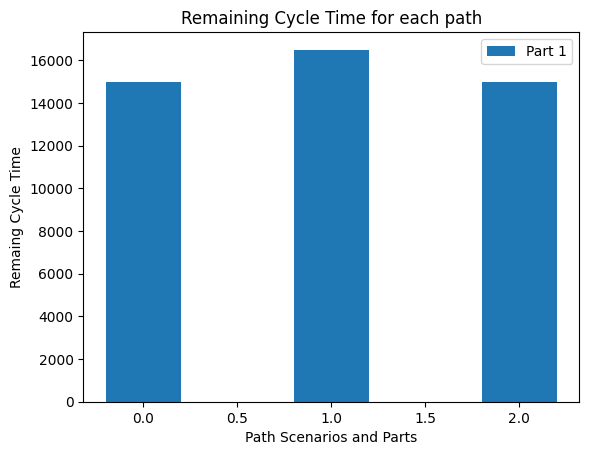

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


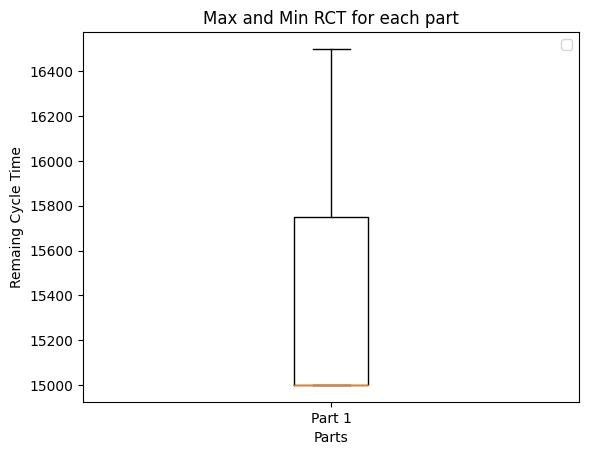

____________________________________________


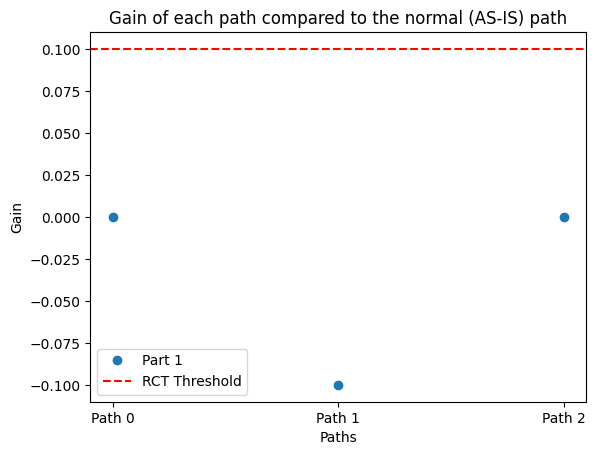

----- No Path found with gain higher than 10.0% -----


In [5]:
mydt.run_RCT_services(verbose= True)

#### Running validation with different real and digital database
Keep the old real database (without copying it), change the model and run the simulation


1) **Logic Validation:** Change the capacity of all queues to 1

==========  Reading the Model: 5s_determ  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 3
|-- Parts stored: Part 1
|-- Parts stored: Part 2
|-- Parts stored: Part 3
Queue Lenght: 3
----------------
Queue 2
Arc links: [1, 2]
Capacity: 1
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 1
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 2
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 1
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
Branching Machine: Branch 1 | Machine 1
|-- Conveyor towards Queue 2
|-- Conveyor towards Queue 3
--- Part already being processed: Part 4 ---
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Cluster: 2
--- Part already being processed: Part 5 ---
----

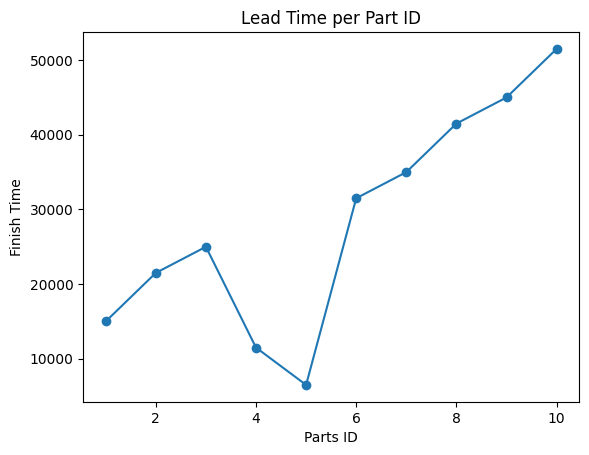

- Maximum Cycle Time: 26500
- Minimum Cycle Time: 6500
>>> Average system cycle time: 20450.0 [time unit]***


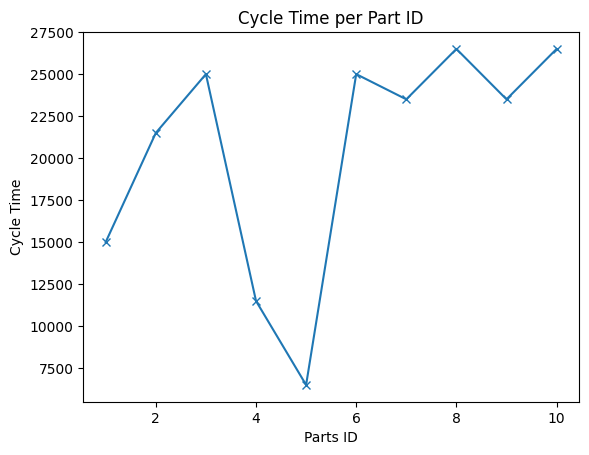

>>> System Throughput: 0.0001941747572815534 [parts / time unit] 


<Figure size 640x480 with 0 Axes>

In [6]:
mydt.run_digital_model()

In [7]:
mydt.run_validation(copied_realDB= False)

==========  Reading the Model: 5s_determ  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 3
|-- Parts stored: Part 1
|-- Parts stored: Part 2
|-- Parts stored: Part 3
Queue Lenght: 3
----------------
Queue 2
Arc links: [1, 2]
Capacity: 1
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 1
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 2
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 1
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
Branching Machine: Branch 1 | Machine 1
|-- Conveyor towards Queue 2
|-- Conveyor towards Queue 3
--- Part already being processed: Part 4 ---
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Cluster: 2
--- Part already being processed: Part 5 ---
----

Logic: LCSS Indicator: 0.3902439024390244

input: LCSS Indicator: 0.9523809523809523

2) **Input Validation:** Change back the capacity of all queues to 10, but change the distribution of the second machine from 5000 to 8000

### ============ Simulation Started ============ ###
Time: 1097 - [Conveyor towards Queue 2] GOT Part 4
Time: 1097 - [Machine 1] got Part 1 from Queue 1 (capacity= 2)
Time: 1297 - [Conveyor towards Queue 2] PUT Part 4 in the Queue 2
Time: 4298 - [Conveyor towards Queue 4] GOT Part 5
Time: 4298 - [Machine 2] got Part 4 from Queue 2 (capacity= 0)
Time: 4398 - [Conveyor towards Queue 4] PUT Part 5 in the Queue 4
Time: 4399 - [Machine 4] got Part 5 from Queue 4 (capacity= 0)
Time: 6097 - [Conveyor towards Queue 3] GOT Part 1
Time: 6097 - [Machine 1] got Part 2 from Queue 1 (capacity= 1)
Time: 6297 - [Conveyor towards Queue 3] PUT Part 1 in the Queue 3
Time: 6298 - [Machine 3] got Part 1 from Queue 3 (capacity= 0)
Time: 7399 - [Conveyor towards Queue 5] GOT Part 5
Time: 7499 - [Conveyor towards Queue 5] PUT Part 5 in the Queue 5
Time: 7500 - [Machine 5] got Part 5 from Queue 5 (capacity= 0)
Time: 9500 - [Terminator] xxx Part 5 terminated xxx
Time: 9500 - [Terminator] Part 6 replaced
Time: 9

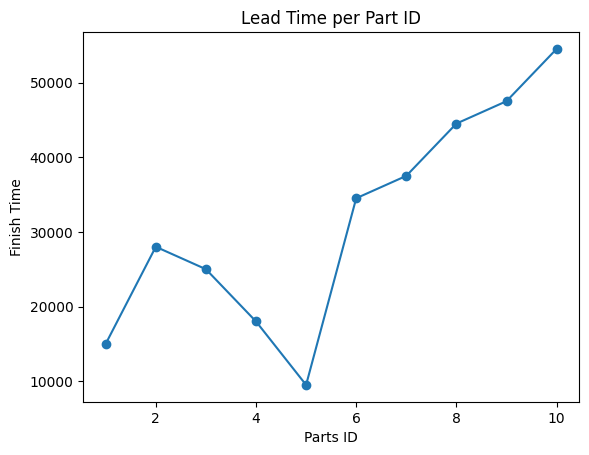

- Maximum Cycle Time: 28000
- Minimum Cycle Time: 9500
>>> Average system cycle time: 21850.0 [time unit]***


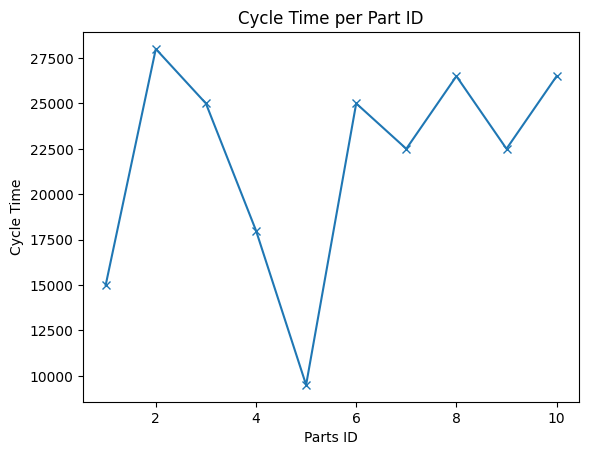

>>> System Throughput: 0.0001834862385321101 [parts / time unit] 


<Figure size 640x480 with 0 Axes>

In [14]:
mydt.run_digital_model(verbose= False, generate_model= True)


In [15]:
mydt.run_validation(copied_realDB= True)

==========  Reading the Model: 5s_determ  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
|-- Parts stored: Part 1
|-- Parts stored: Part 2
|-- Parts stored: Part 3
Queue Lenght: 3
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 20
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
Branching Machine: Branch 1 | Machine 1
|-- Conveyor towards Queue 2
|-- Conveyor towards Queue 3
--- Part already being processed: Part 4 ---
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Cluster: 2
--- Part already being processed: Part 5 ---

change the distribution of 2 machiens

### ============ Simulation Started ============ ###
Time: 1097 - [Conveyor towards Queue 2] GOT Part 4
Time: 1097 - [Machine 1] got Part 1 from Queue 1 (capacity= 2)
Time: 1297 - [Conveyor towards Queue 2] PUT Part 4 in the Queue 2
Time: 4298 - [Conveyor towards Queue 4] GOT Part 5
Time: 4298 - [Machine 2] got Part 4 from Queue 2 (capacity= 0)
Time: 4398 - [Conveyor towards Queue 4] PUT Part 5 in the Queue 4
Time: 4399 - [Machine 4] got Part 5 from Queue 4 (capacity= 0)
Time: 6097 - [Conveyor towards Queue 3] GOT Part 1
Time: 6097 - [Machine 1] got Part 2 from Queue 1 (capacity= 1)
Time: 6297 - [Conveyor towards Queue 3] PUT Part 1 in the Queue 3
Time: 6298 - [Machine 3] got Part 1 from Queue 3 (capacity= 0)
Time: 7399 - [Conveyor towards Queue 5] GOT Part 5
Time: 7499 - [Conveyor towards Queue 5] PUT Part 5 in the Queue 5
Time: 7500 - [Machine 5] got Part 5 from Queue 5 (capacity= 0)
Time: 9500 - [Terminator] xxx Part 5 terminated xxx
Time: 9500 - [Terminator] Part 6 replaced
Time: 9

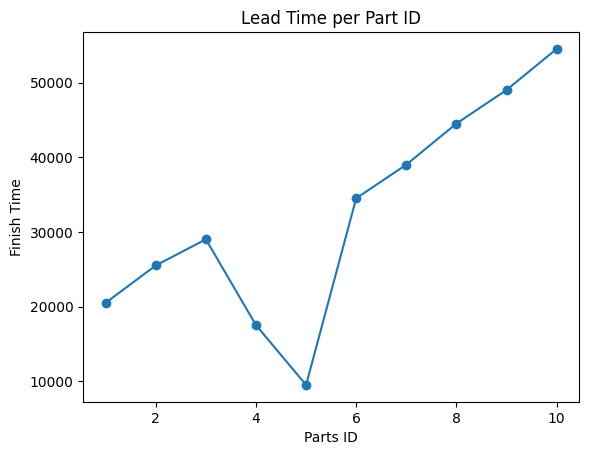

- Maximum Cycle Time: 29000
- Minimum Cycle Time: 9500
>>> Average system cycle time: 22150.0 [time unit]***


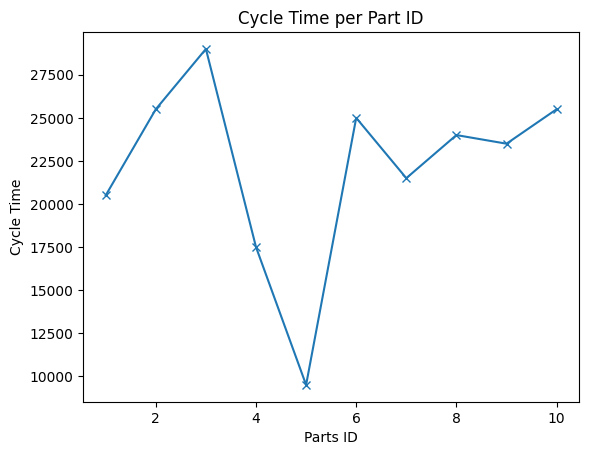

>>> System Throughput: 0.0001834862385321101 [parts / time unit] 


<Figure size 640x480 with 0 Axes>

In [18]:
mydt.run_digital_model(verbose= False, generate_model= True)

In [11]:
mydt.run_validation(copied_realDB= True)

==========  Reading the Model: 5s_determ  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
|-- Parts stored: Part 1
|-- Parts stored: Part 2
|-- Parts stored: Part 3
Queue Lenght: 3
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 20
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
Branching Machine: Branch 1 | Machine 1
|-- Conveyor towards Queue 2
|-- Conveyor towards Queue 3
--- Part already being processed: Part 4 ---
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Cluster: 2
--- Part already being processed: Part 5 ---

### ============ Simulation Started ============ ###
Time: 1097 - [Conveyor towards Queue 2] GOT Part 4
Time: 1097 - [Machine 1] got Part 1 from Queue 1 (capacity= 2)
Time: 1297 - [Conveyor towards Queue 2] PUT Part 4 in the Queue 2
Time: 6097 - [Conveyor towards Queue 3] GOT Part 1
Time: 6097 - [Machine 1] got Part 2 from Queue 1 (capacity= 1)
Time: 6297 - [Conveyor towards Queue 3] PUT Part 1 in the Queue 3
Time: 6298 - [Machine 3] got Part 1 from Queue 3 (capacity= 0)
Time: 11097 - [Conveyor towards Queue 2] GOT Part 2
Time: 11097 - [Machine 1] got Part 3 from Queue 1 (capacity= 0)
Time: 11297 - [Conveyor towards Queue 2] PUT Part 2 in the Queue 2
Time: 11298 - [Conveyor towards Queue 4] GOT Part 5
Time: 11298 - [Machine 2] got Part 4 from Queue 2 (capacity= 1)
Time: 11298 - [Conveyor towards Queue 4] GOT Part 1
Time: 11398 - [Conveyor towards Queue 4] PUT Part 5 in the Queue 4
Time: 11398 - [Conveyor towards Queue 4] PUT Part 1 in the Queue 4
Time: 11399 - [Machine 4] got Part 5 fr

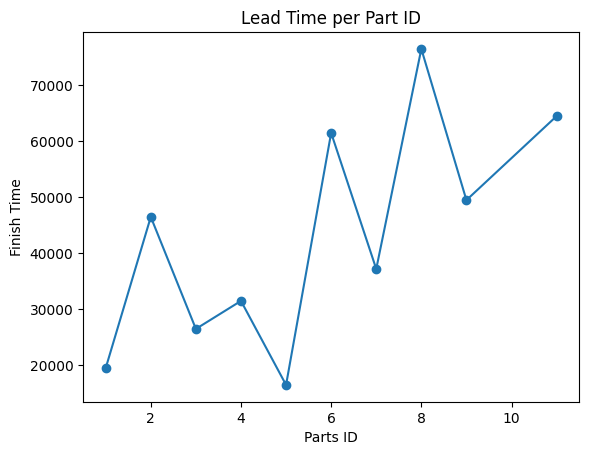

- Maximum Cycle Time: 50000
- Minimum Cycle Time: 16500
>>> Average system cycle time: 28920.4 [time unit]***


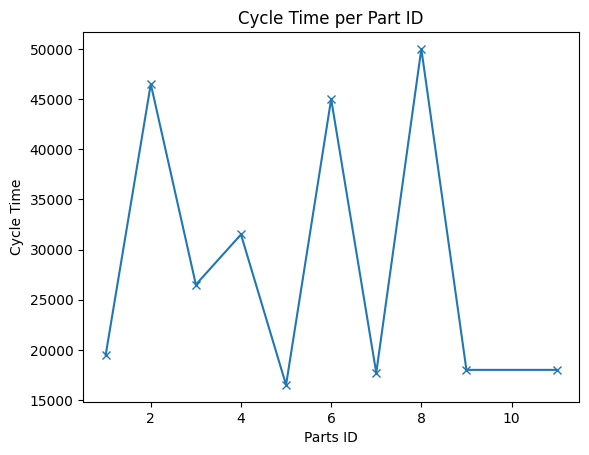

>>> System Throughput: 0.00013071895424836603 [parts / time unit] 


<Figure size 640x480 with 0 Axes>

In [17]:
mydt.run_digital_model(verbose=False)

In [15]:
mydt.run_validation()

==========  Reading the Model: 5s_determ  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 3
|-- Parts stored: Part 1
|-- Parts stored: Part 2
|-- Parts stored: Part 3
Queue Lenght: 3
----------------
Queue 2
Arc links: [1, 2]
Capacity: 1
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 1
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 2
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 1
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
Branching Machine: Branch 1 | Machine 1
|-- Conveyor towards Queue 2
|-- Conveyor towards Queue 3
--- Part already being processed: Part 4 ---
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Cluster: 2
--- Part already being processed: Part 5 ---
----

==========  Reading the Model: 5s_determ  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 3
|-- Parts stored: Part 1
|-- Parts stored: Part 2
|-- Parts stored: Part 3
Queue Lenght: 3
----------------
Queue 2
Arc links: [1, 2]
Capacity: 1
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 1
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 2
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 1
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
Branching Machine: Branch 1 | Machine 1
|-- Conveyor towards Queue 2
|-- Conveyor towards Queue 3
--- Part already being processed: Part 4 ---
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Cluster: 2
--- Part already being processed: Part 5 ---
----

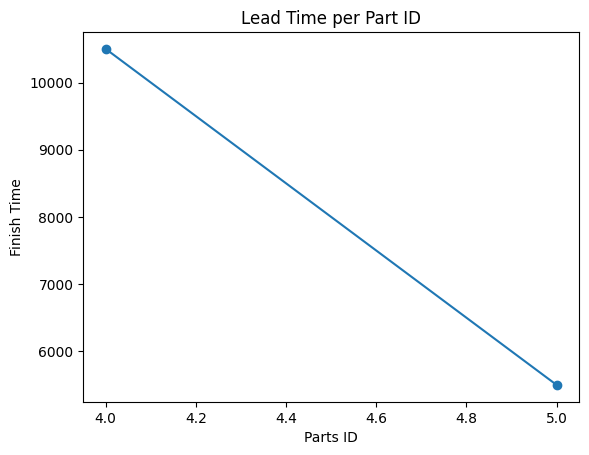

- Maximum Cycle Time: 10500
- Minimum Cycle Time: 5500
>>> Average system cycle time: 8000.0 [time unit]***


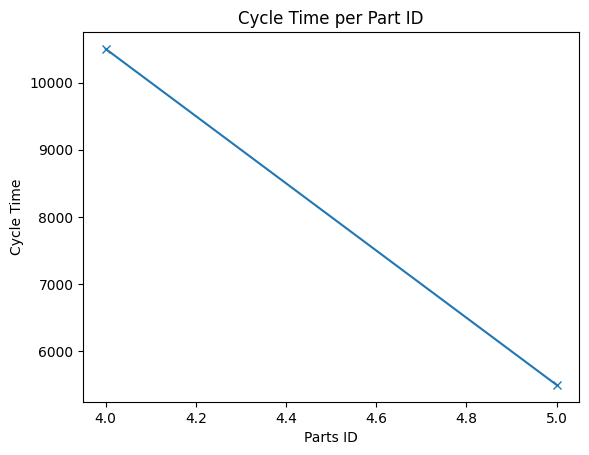

>>> System Throughput: 0.00019047619047619048 [parts / time unit] 


<Figure size 640x480 with 0 Axes>

In [11]:
mydt.run_digital_model(maxparts=2)

==========  Reading the Model: 5s_determ  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 3
|-- Parts stored: Part 1
|-- Parts stored: Part 2
|-- Parts stored: Part 3
Queue Lenght: 3
----------------
Queue 2
Arc links: [1, 2]
Capacity: 1
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 1
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 2
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 1
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
Branching Machine: Branch 1 | Machine 1
|-- Conveyor towards Queue 2
|-- Conveyor towards Queue 3
--- Part already being processed: Part 4 ---
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Cluster: 2
--- Part already being processed: Part 5 ---
----

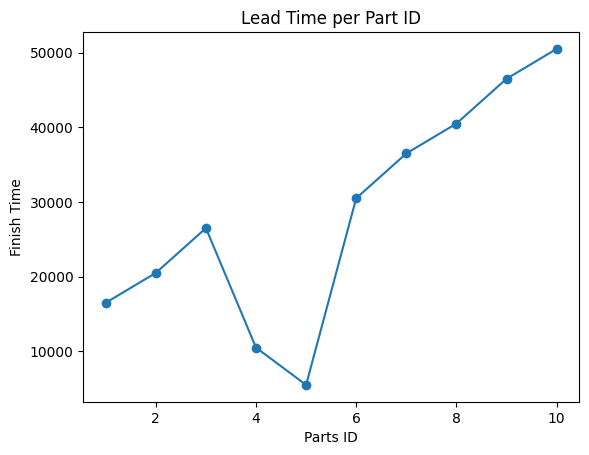

- Maximum Cycle Time: 26500
- Minimum Cycle Time: 5500
>>> Average system cycle time: 20450.0 [time unit]***


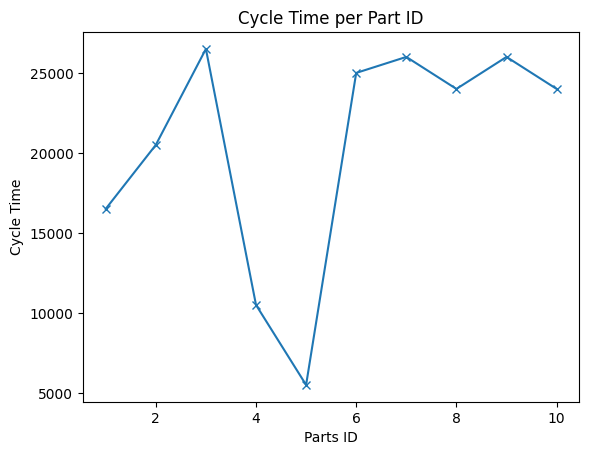

>>> System Throughput: 0.00019801980198019803 [parts / time unit] 


<Figure size 640x480 with 0 Axes>

In [18]:
mydt.run_digital_model(maxparts=10)

In [16]:
db = Database(database_path= "databases/digital_5s_determ_db.db", event_table= "digital_log")
db.read_all_events(table="digital_log")

=== Reading all the events from table: digital_log ===
(1, 1097, 'Machine 1', 'Finished', 'Part 4', 'Queue 2')
(2, 1097, 'Machine 1', 'Started', 'Part 1', 'Queue 1')
(3, 6097, 'Machine 1', 'Finished', 'Part 1', 'Queue 3')
(4, 6097, 'Machine 1', 'Started', 'Part 2', 'Queue 1')
(5, 6298, 'Machine 2', 'Finished', 'Part 5', 'Queue 4')
(6, 6298, 'Machine 2', 'Started', 'Part 4', 'Queue 2')
(7, 6298, 'Machine 3', 'Started', 'Part 1', 'Queue 3')
(8, 6399, 'Machine 4', 'Started', 'Part 5', 'Queue 4')
(9, 9399, 'Machine 4', 'Finished', 'Part 5', 'Queue 5')
(10, 9500, 'Machine 5', 'Started', 'Part 5', 'Queue 5')
(11, 11097, 'Machine 1', 'Finished', 'Part 2', 'Queue 2')
(12, 11097, 'Machine 1', 'Started', 'Part 3', 'Queue 1')
(13, 11298, 'Machine 3', 'Finished', 'Part 1', 'Queue 4')
(14, 11399, 'Machine 4', 'Started', 'Part 1', 'Queue 4')
(15, 11500, 'Machine 5', 'Finished', 'Part 5', 'Queue 1')
(16, 14399, 'Machine 4', 'Finished', 'Part 1', 'Queue 5')
(17, 14500, 'Machine 5', 'Started', 'Part 1'

In [2]:
l = [1,2,3]
for i in range(2,len(l)):
    print(i)

2


==========  Reading the Model: 5s_determ  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 3
|-- Parts stored: Part 1
|-- Parts stored: Part 2
|-- Parts stored: Part 3
Queue Lenght: 3
----------------
Queue 2
Arc links: [1, 2]
Capacity: 1
|-- Parts stored: Part 4
Queue Lenght: 1
----------------
Queue 3
Arc links: [1, 3]
Capacity: 1
|-- Parts stored: Part 5
Queue Lenght: 1
----------------
Queue 4
Arc links: None
Capacity: 2
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 1
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
Branching Machine: Branch 1 | Machine 1
|-- Conveyor towards Queue 2
|-- Conveyor towards Queue 3
--- Part already being processed: Part 6 ---
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Cluster: 2

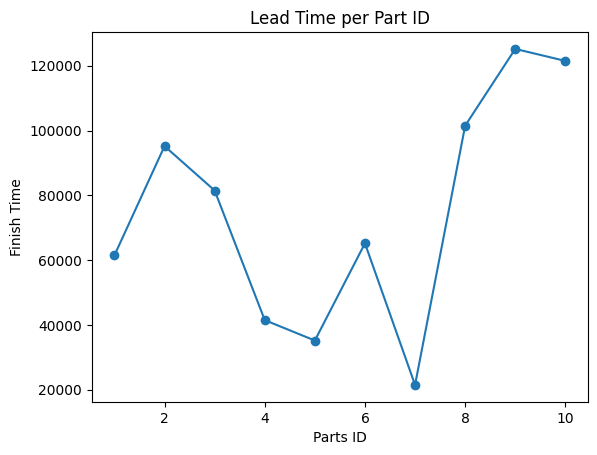

- Maximum Cycle Time: 95202
- Minimum Cycle Time: 21500
>>> Average system cycle time: 65160.6 [time unit]***


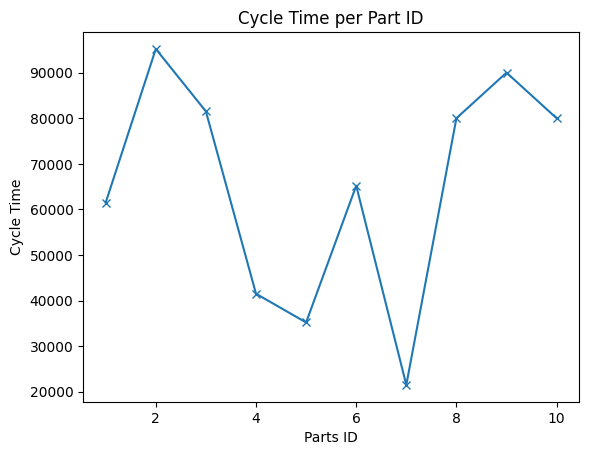

>>> System Throughput: 7.987092857941566e-05 [parts / time unit] 


<Figure size 640x480 with 0 Axes>

In [13]:
mydt = Digital_Twin(name="5s_determ", maxparts= 10)
mydt.run_digital_model()

### ============ Simulation Started ============ ###
Time: 0 - [Machine 3] got Part 5 from Queue 3 (capacity= 0)
Time: 1097 - [Conveyor towards Queue 3] GOT Part 6
Time: 1097 - [Machine 1] got Part 1 from Queue 1 (capacity= 2)
Time: 1297 - [Conveyor towards Queue 3] PUT Part 6 in the Queue 3
Time: 6298 - [Conveyor towards Queue 4] GOT Part 7
Time: 6298 - [Machine 2] got Part 4 from Queue 2 (capacity= 0)
Time: 6299 - [Conveyor towards Queue 2] GOT Part 1
Time: 6299 - [Machine 1] got Part 2 from Queue 1 (capacity= 1)
Time: 6398 - [Conveyor towards Queue 4] PUT Part 7 in the Queue 4
Time: 6399 - [Machine 4] got Part 7 from Queue 4 (capacity= 0)
Time: 6499 - [Conveyor towards Queue 2] PUT Part 1 in the Queue 2
Time: 7000 - [Conveyor towards Queue 4] GOT Part 5
Time: 7000 - [Machine 3] got Part 6 from Queue 3 (capacity= 0)
Time: 7100 - [Conveyor towards Queue 4] PUT Part 5 in the Queue 4
Time: 9399 - [Conveyor towards Queue 5] GOT Part 7
Time: 9399 - [Machine 4] got Part 5 from Queue 4 (cap

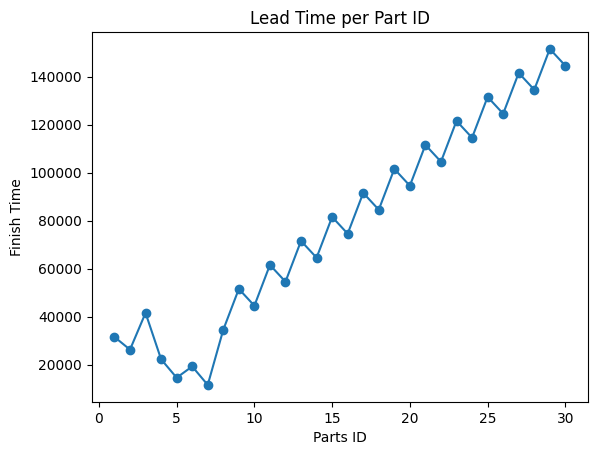

- Maximum Cycle Time: 41500
- Minimum Cycle Time: 11500
>>> Average system cycle time: 31650.0 [time unit]***


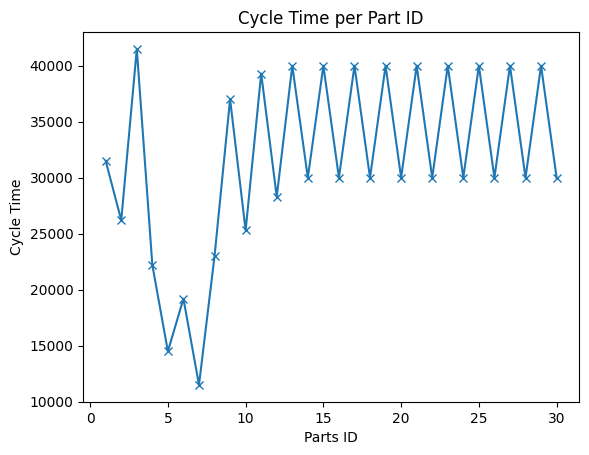

>>> System Throughput: 0.00019801980198019803 [parts / time unit] 


<Figure size 640x480 with 0 Axes>

In [4]:
mydt = Digital_Twin(name= "5s_determ", maxparts= 30)
mydt.run_digital_model(verbose=False)


In [5]:
mydt.run_validation()

==========  Reading the Model: 5s_determ  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 3
|-- Parts stored: Part 1
|-- Parts stored: Part 2
|-- Parts stored: Part 3
Queue Lenght: 3
----------------
Queue 2
Arc links: [1, 2]
Capacity: 1
|-- Parts stored: Part 4
Queue Lenght: 1
----------------
Queue 3
Arc links: [1, 3]
Capacity: 1
|-- Parts stored: Part 5
Queue Lenght: 1
----------------
Queue 4
Arc links: None
Capacity: 2
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 1
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
Branching Machine: Branch 1 | Machine 1
|-- Conveyor towards Queue 2
|-- Conveyor towards Queue 3
--- Part already being processed: Part 6 ---
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Cluster: 2